# Non paraxial phase

$$ \Delta(x,y) = R_{1}\left(1 - \frac{|\xi_{+}|^{2}}{R_{1}^{2}} \right)^{1/2} - R_{2}\left(1 - \frac{|\xi_{+}|^{2}}{R_{2}^{2}} \right)^{1/2} + R_{2}\left(1 - \frac{|\xi_{-}|^{2}}{R_{2}^{2}} \right)^{1/2} - R_{1}\left(1 - \frac{|\xi_{-}|^{2}}{R_{1}^{2}} \right)^{1/2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
%matplotlib widget

## Modelamiento de la fase

In [2]:
def phase_3D(x,y, r1, r2,wa):
    norm2 = (x ** 2) + (y ** 2)
    phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
    phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))
    phase_12 = phase_1 + phase_2
    
    k = ((2*np.pi)/wa)
    n = 1.5
    phase_im = np.exp(1j*(n -1)*k*phase_12)
    phase_parax = np.exp(1j*(n -1)*k*(-norm2)* ((1/r1)- (1/r2)) )
    phase_parax = np.real(phase_parax)
    phase = np.real(phase_im)
    phase = np.nan_to_num(phase, nan = -1)
    return phase

In [3]:
w = 400 * (10 ** -9)
r1 = 4*w
r2 = -4*w
r1, r2

(1.6000000000000001e-06, -1.6000000000000001e-06)

/tmp/ipykernel_13604/753951705.py:3: RuntimeWarning: invalid value encountered in sqrt
  phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
/tmp/ipykernel_13604/753951705.py:4: RuntimeWarning: invalid value encountered in sqrt
  phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))


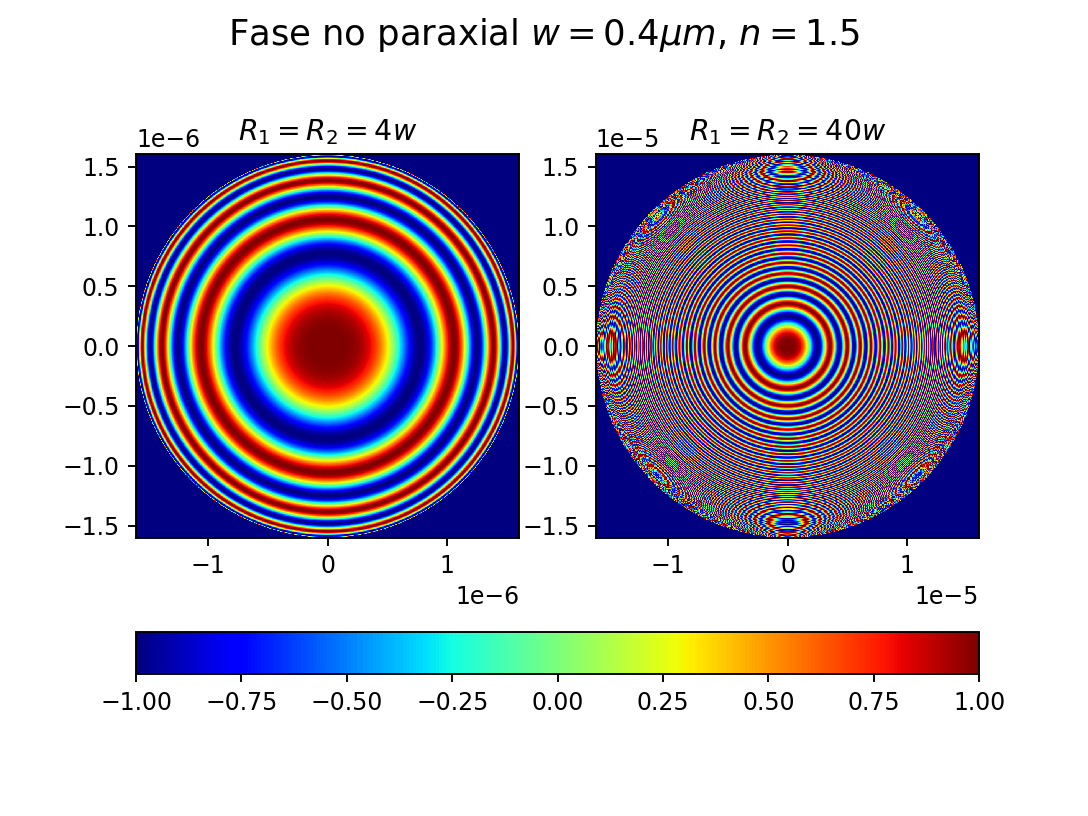

CPU times: user 2.66 s, sys: 350 ms, total: 3.01 s
Wall time: 2.73 s


In [15]:
%%time
square = np.linspace(-4*w, 4*w, 1000)
square_big = np.linspace(-40*w, 40*w, 1000)

xx,yy = np.meshgrid(square, square)
xx_big,yy_big = np.meshgrid(square_big, square_big)

zz = np.array(list(phase_3D(xx,yy,r1,r2,w)), dtype=float)
zz_big = np.array(list(phase_3D(xx_big,yy_big,r1*10,r2*10,w)), dtype=float)

z_mi, z_ma = zz.min()/1, zz.max()/1

fig, ax = plt.subplots(ncols = 2, dpi=170, subplot_kw={'aspect': 'equal'})
c = ax[0].pcolormesh(xx, yy, zz, cmap='jet',  vmin = z_mi, vmax = z_ma)
ax[0].set_title(r'$ R_{1} = R_{2} = 4w $', size = 12)

ax[1].pcolormesh(xx_big, yy_big, zz_big, cmap='jet',  vmin = z_mi, vmax = z_ma)
ax[1].set_title(r'$ R_{1} = R_{2} = 40w $', size = 12)

fig.suptitle(r'Fase no paraxial $w = 0.4 \mu m $, $n = 1.5$', size = 15)

fig.colorbar(c, ax = ax, orientation = 'horizontal')
#plt.savefig('NonParaxialPhase_w0.4_n1.5.png')

plt.show()

/tmp/ipykernel_13604/753951705.py:3: RuntimeWarning: invalid value encountered in sqrt
  phase_1 = -r1 + (r1 * np.sqrt( 1 - (norm2/(r1 ** 2)) ))
/tmp/ipykernel_13604/753951705.py:4: RuntimeWarning: invalid value encountered in sqrt
  phase_2 = r2 + (-r2 * np.sqrt( 1 - (norm2/(r2 ** 2)) ))


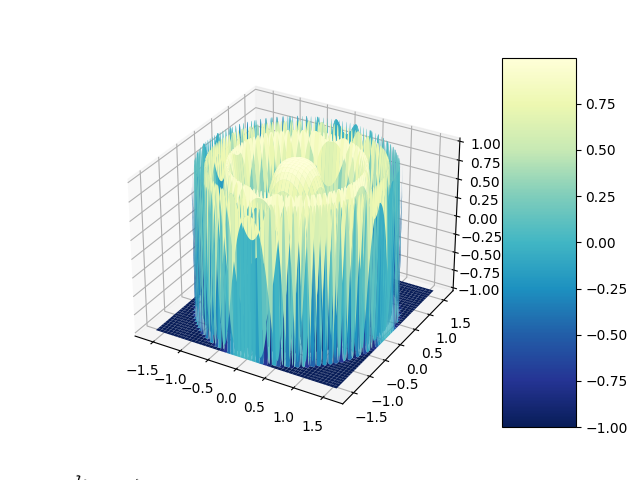

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
square = np.linspace(-4*w, 4*w, 1000)
X = square
Y = square
X, Y = np.meshgrid(X, Y)
Z =phase_3D(xx,yy,r1,r2,w)

#np.nan_to_num(Z, nan = 0)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Customize the z axis.
ax.set_zlim(Z.min(), Z.max())
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=5)

plt.show()